## IMPORING THE MODULES


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Data set
x=np.arange(-100,100,4)
x

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [4]:
y=np.arange(-90,110,4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [5]:
## spliting the data into training and test data
x_train=x[:40] ## first 40 examples
y_train=y[:40] ## first 40 examples

x_test=x[40:] ## last 10 examples
y_test=y[40:] ## last 10 examples

## VISUALIZING THE DATA


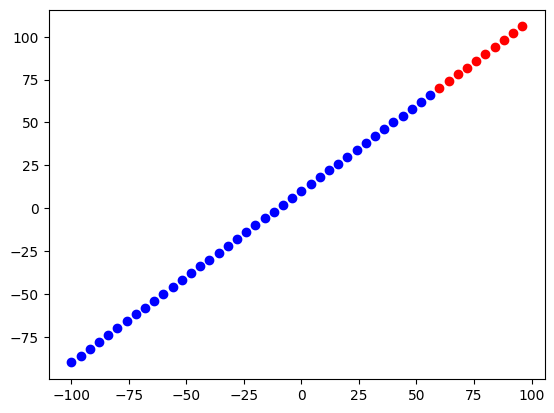

In [6]:
plt.scatter(x_train,y_train,c='b',label='training data')
plt.scatter(x_test,y_test,c='r',label='testing data')


## BUILDING A MODEL


In [14]:
## set random seed
tf.random.set_seed(42)

## creating a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

## compiling the model

model.compile(loss=tf.keras.losses.mae, ## The loss function calculates how far the predicted values are from the actual values.
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), ## The optimizer adjusts the model’s weights to minimize the loss.
              metrics=['mae'])

## fitting the model

model.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=300,verbose=0)


In [16]:
## checking model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,665 (14.32 KB)

 Trainable params: 1,221 (4.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,444 (9.55 KB)

## VISUALIZING THE PREDICTIONS

In [17]:
y_pred=model.predict(tf.expand_dims(x_test,axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


array([[ 72.00172],
       [ 76.1234 ],
       [ 80.24436],
       [ 84.3648 ],
       [ 88.48525],
       [ 92.60526],
       [ 96.72515],
       [100.84505],
       [104.96494],
       [109.08483]], dtype=float32)

In [22]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

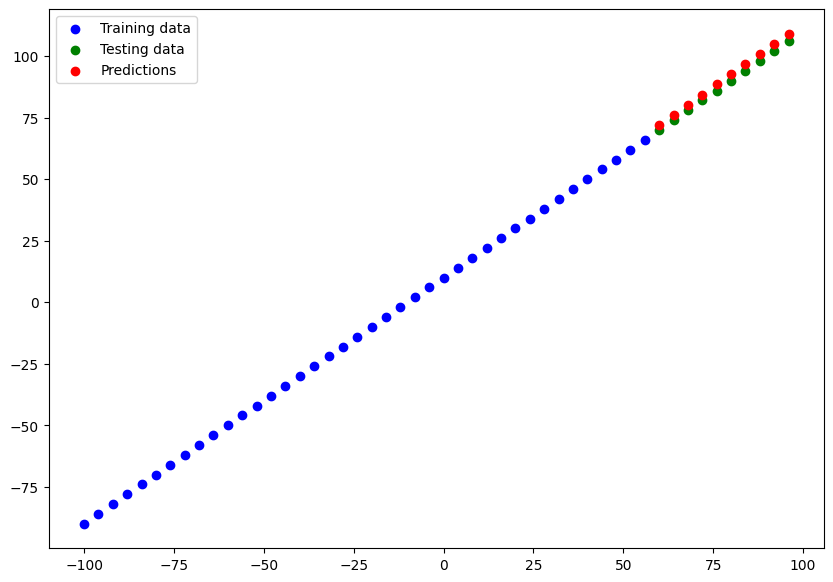

In [23]:
plot_predictions(predictions=y_pred)

## Evaluate the predictions


In [35]:
mae = tf.keras.losses.MAE(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2.0017166, 2.1233978, 2.2443619, 2.3647995, 2.4852524, 2.6052628,
       2.725151 , 2.845047 , 2.964943 , 3.0848312], dtype=float32)>

In [36]:
mse=mae = tf.keras.losses.MSE(y_true=y_test,
                                     y_pred=y_pred)
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([4.0068693, 4.508818 , 5.0371604, 5.5922766, 6.1764793, 6.787394 ,
       7.4264483, 8.094293 , 8.790887 , 9.516184 ], dtype=float32)>

## SAVING THE MODEL

In [40]:

model.save('NN_REGRESSION_MODEL.h5')

In [42]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("NN_REGRESSION_MODEL.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Loading a model


In [44]:

# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("NN_REGRESSION_MODEL.h5")
loaded_saved_model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,223 (4.78 KB)

 Trainable params: 1,221 (4.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)